# CS5710-11595 HOMEWORK 4
## HEMANTH VAMSI KRISHNA DEVADULA (700773640)

## Part A: Calculation
### Q1. Find the cluster using the Average and MIN technique. Use Euclidean distance to build the complete distance matrix, updated the distance matrix to the final step and draw the dendrogram for each.

INITIAL EUCLIDEAN DISTANCE MATRIX

        P1      P2      P3      P4      P5      P6      P7      
P1         0.000   0.283   0.516   0.425   0.394   0.231   0.455
P2         0.283   0.000   0.242   0.180   0.424   0.132   0.175
P3         0.516   0.242   0.000   0.117   0.506   0.305   0.071
P4         0.425   0.180   0.117   0.000   0.392   0.200   0.104
P5         0.394   0.424   0.506   0.392   0.000   0.295   0.490
P6         0.231   0.132   0.305   0.200   0.295   0.000   0.256
P7         0.455   0.175   0.071   0.104   0.490   0.256   0.000

AVERAGE LINKAGE CLUSTERING

Clustering steps:
Step | Cluster1 | Cluster2 | Distance | New Cluster Size
------------------------------------------------------------
   1 |        2 |        6 |    0.071 |                2
   2 |        3 |        7 |    0.111 |                3
   3 |        1 |        5 |    0.132 |                2
   4 |        8 |        9 |    0.226 |                5
   5 |        0 |       10 |    0.382 |             

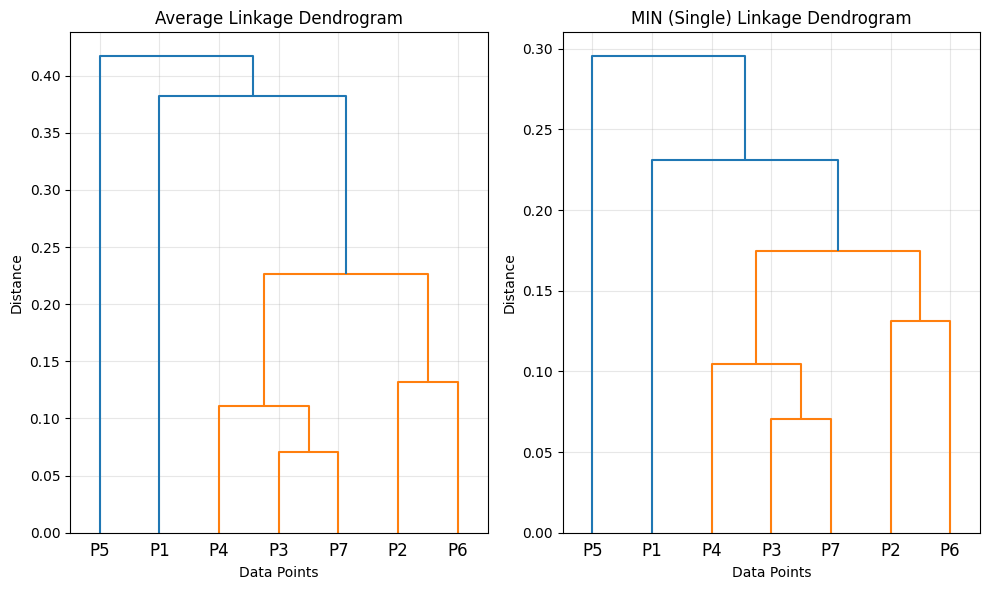


DETAILED STEP-BY-STEP: AVERAGE LINKAGE

Step 1: Merge clusters containing ['P3'] and ['P7']
Distance: 0.071

Step 2: Merge clusters containing ['P3', 'P7'] and ['P4']
Distance: 0.111

Step 3: Merge clusters containing ['P2'] and ['P6']
Distance: 0.132

Step 4: Merge clusters containing ['P2', 'P6'] and ['P3', 'P7', 'P4']
Distance: 0.226

Step 5: Merge clusters containing ['P1'] and ['P2', 'P6', 'P3', 'P7', 'P4']
Distance: 0.382

Step 6: Merge clusters containing ['P1', 'P2', 'P6', 'P3', 'P7', 'P4'] and ['P5']
Distance: 0.417

DETAILED STEP-BY-STEP: MIN (SINGLE) LINKAGE

Step 1: Merge clusters containing ['P3'] and ['P7']
Distance: 0.071

Step 2: Merge clusters containing ['P3', 'P7'] and ['P4']
Distance: 0.104

Step 3: Merge clusters containing ['P2'] and ['P6']
Distance: 0.132

Step 4: Merge clusters containing ['P2', 'P6'] and ['P3', 'P7', 'P4']
Distance: 0.175

Step 5: Merge clusters containing ['P1'] and ['P2', 'P6', 'P3', 'P7', 'P4']
Distance: 0.231

Step 6: Merge clusters contai

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Data points
data = np.array([
    [0.4, 0.5],   # P1
    [0.2, 0.3],   # P2
    [0.1, 0.08],  # P3
    [0.21, 0.12], # P4
    [0.6, 0.16],  # P5
    [0.33, 0.28], # P6
    [0.11, 0.15]  # P7
])

labels = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Step 1: Calculate initial distance matrix
n = len(data)
distance_matrix = np.zeros((n, n))

print("="*60)
print("INITIAL EUCLIDEAN DISTANCE MATRIX")
print("="*60)
print("\n        ", end="")
for label in labels:
    print(f"{label:8}", end="")
print()

for i in range(n):
    print(f"{labels[i]:8}", end="")
    for j in range(n):
        if i != j:
            distance_matrix[i][j] = euclidean_distance(data[i], data[j])
        print(f"{distance_matrix[i][j]:8.3f}", end="")
    print()

print("\n" + "="*60)
print("AVERAGE LINKAGE CLUSTERING")
print("="*60)

# Perform Average linkage clustering
Z_average = linkage(data, method='average', metric='euclidean')

print("\nClustering steps:")
print("Step | Cluster1 | Cluster2 | Distance | New Cluster Size")
print("-"*60)
for i, (c1, c2, dist, size) in enumerate(Z_average):
    print(f"{i+1:4} | {int(c1):8} | {int(c2):8} | {dist:8.3f} | {int(size):16}")

# Create dendrogram for Average linkage
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
dendrogram(Z_average, labels=labels)
plt.title('Average Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True, alpha=0.3)

print("\n" + "="*60)
print("MIN (SINGLE) LINKAGE CLUSTERING")
print("="*60)

# Perform MIN (Single) linkage clustering
Z_single = linkage(data, method='single', metric='euclidean')

print("\nClustering steps:")
print("Step | Cluster1 | Cluster2 | Distance | New Cluster Size")
print("-"*60)
for i, (c1, c2, dist, size) in enumerate(Z_single):
    print(f"{i+1:4} | {int(c1):8} | {int(c2):8} | {dist:8.3f} | {int(size):16}")

# Create dendrogram for MIN linkage
plt.subplot(1, 2, 2)
dendrogram(Z_single, labels=labels)
plt.title('MIN (Single) Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dendrograms.png', dpi=300, bbox_inches='tight')
print("\nDendrograms saved as 'dendrograms.png'")
plt.show()

# Manual step-by-step for Average Linkage (for educational purposes)
print("\n" + "="*60)
print("DETAILED STEP-BY-STEP: AVERAGE LINKAGE")
print("="*60)

# Create a copy for manual clustering
active_clusters = {i: [i] for i in range(n)}
dist_matrix = distance_matrix.copy()

step = 1
while len(active_clusters) > 1:
    # Find minimum distance
    min_dist = float('inf')
    min_i, min_j = -1, -1

    cluster_ids = list(active_clusters.keys())
    for i in range(len(cluster_ids)):
        for j in range(i+1, len(cluster_ids)):
            ci, cj = cluster_ids[i], cluster_ids[j]
            if dist_matrix[ci][cj] < min_dist:
                min_dist = dist_matrix[ci][cj]
                min_i, min_j = ci, cj

    print(f"\nStep {step}: Merge clusters containing", end=" ")
    print(f"{[labels[x] for x in active_clusters[min_i]]} and {[labels[x] for x in active_clusters[min_j]]}")
    print(f"Distance: {min_dist:.3f}")

    # Merge clusters
    new_cluster = active_clusters[min_i] + active_clusters[min_j]

    # Update distance matrix using average linkage
    for other_id in cluster_ids:
        if other_id != min_i and other_id != min_j:
            # Calculate average distance
            total_dist = 0
            count = 0
            for p1 in active_clusters[min_i]:
                for p2 in active_clusters[other_id]:
                    total_dist += distance_matrix[p1][p2]
                    count += 1
            for p1 in active_clusters[min_j]:
                for p2 in active_clusters[other_id]:
                    total_dist += distance_matrix[p1][p2]
                    count += 1
            avg_dist = total_dist / count
            dist_matrix[min_i][other_id] = avg_dist
            dist_matrix[other_id][min_i] = avg_dist

    # Remove min_j cluster
    del active_clusters[min_j]
    active_clusters[min_i] = new_cluster

    step += 1

print("\n" + "="*60)
print("DETAILED STEP-BY-STEP: MIN (SINGLE) LINKAGE")
print("="*60)

# Manual step-by-step for MIN Linkage
active_clusters = {i: [i] for i in range(n)}
dist_matrix = distance_matrix.copy()

step = 1
while len(active_clusters) > 1:
    # Find minimum distance
    min_dist = float('inf')
    min_i, min_j = -1, -1

    cluster_ids = list(active_clusters.keys())
    for i in range(len(cluster_ids)):
        for j in range(i+1, len(cluster_ids)):
            ci, cj = cluster_ids[i], cluster_ids[j]
            if dist_matrix[ci][cj] < min_dist:
                min_dist = dist_matrix[ci][cj]
                min_i, min_j = ci, cj

    print(f"\nStep {step}: Merge clusters containing", end=" ")
    print(f"{[labels[x] for x in active_clusters[min_i]]} and {[labels[x] for x in active_clusters[min_j]]}")
    print(f"Distance: {min_dist:.3f}")

    # Merge clusters
    new_cluster = active_clusters[min_i] + active_clusters[min_j]

    # Update distance matrix using single linkage (MIN)
    for other_id in cluster_ids:
        if other_id != min_i and other_id != min_j:
            # Calculate minimum distance
            min_link_dist = float('inf')
            for p1 in active_clusters[min_i]:
                for p2 in active_clusters[other_id]:
                    min_link_dist = min(min_link_dist, distance_matrix[p1][p2])
            for p1 in active_clusters[min_j]:
                for p2 in active_clusters[other_id]:
                    min_link_dist = min(min_link_dist, distance_matrix[p1][p2])

            dist_matrix[min_i][other_id] = min_link_dist
            dist_matrix[other_id][min_i] = min_link_dist

    # Remove min_j cluster
    del active_clusters[min_j]
    active_clusters[min_i] = new_cluster

    step += 1

print("\n" + "="*60)
print("COMPLETE!")
print("="*60)

### Part C — Coding
### Q1.
Write Python code to perform the following steps:
Segment into tokens
Remove stopwords
Apply lemmatization (not stemming)
Keep only verbs and nouns (use POS tags)
Input text:"John enjoys playing football while Mary loves reading books in the library."


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added this line
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Input text
text = "John enjoys playing football while Mary loves reading books in the library."

# Step 1: Tokenization
tokens = word_tokenize(text)
print("1. Tokens:", tokens)

# Step 2: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print("\n2. After removing stopwords:", filtered_tokens)

# Helper function to convert POS tags to WordNet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

# Step 3: Apply lemmatization with POS tags
lemmatizer = WordNetLemmatizer()
pos_tags = nltk.pos_tag(filtered_tokens)
print("\n3. POS tags:", pos_tags)

lemmatized_tokens = []
for token, tag in pos_tags:
    wordnet_pos = get_wordnet_pos(tag)
    lemma = lemmatizer.lemmatize(token.lower(), pos=wordnet_pos)
    lemmatized_tokens.append((lemma, tag))

print("\n4. Lemmatized tokens with POS:", lemmatized_tokens)

# Step 4: Keep only verbs and nouns
final_tokens = [lemma for lemma, tag in lemmatized_tokens
                if tag.startswith('V') or tag.startswith('N')]
print("\n5. Final result (only verbs and nouns):", final_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1. Tokens: ['John', 'enjoys', 'playing', 'football', 'while', 'Mary', 'loves', 'reading', 'books', 'in', 'the', 'library', '.']

2. After removing stopwords: ['John', 'enjoys', 'playing', 'football', 'Mary', 'loves', 'reading', 'books', 'library', '.']

3. POS tags: [('John', 'NNP'), ('enjoys', 'VBZ'), ('playing', 'VBG'), ('football', 'NN'), ('Mary', 'NNP'), ('loves', 'VBZ'), ('reading', 'VBG'), ('books', 'NNS'), ('library', 'JJ'), ('.', '.')]

4. Lemmatized tokens with POS: [('john', 'NNP'), ('enjoy', 'VBZ'), ('play', 'VBG'), ('football', 'NN'), ('mary', 'NNP'), ('love', 'VBZ'), ('read', 'VBG'), ('book', 'NNS'), ('library', 'JJ'), ('.', '.')]

5. Final result (only verbs and nouns): ['john', 'enjoy', 'play', 'football', 'mary', 'love', 'read', 'book']


###Q2.
Use Python and any NLP model to perform:
Named Entity Recognition (NER)
Disambiguation prompt:If the text contains a pronoun ("he", "she", "they"), print:
"Warning: Possible pronoun ambiguity detected!"
Input text:"Chris met Alex at Apple headquarters in California. He told him about the new iPhone launch."


In [5]:
from transformers import pipeline

# Load a transformer-based NER model
ner_model = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

# Input text
text = "Chris met Alex at Apple headquarters in California. He told him about the new iPhone launch."

print("=" * 60)
print("NAMED ENTITY RECOGNITION (Using Transformer Model)")
print("=" * 60)

# Step 1: Named Entity Recognition
entities = ner_model(text)
for ent in entities:
    print(f"Text: '{ent['word']}'")
    print(f"  Label: {ent['entity_group']}")
    print(f"  Confidence: {ent['score']:.4f}")
    print()

# Step 2: Pronoun Ambiguity Detection
print("=" * 60)
print("PRONOUN AMBIGUITY DETECTION")
print("=" * 60)

ambiguous_pronouns = {"he", "she", "they", "him", "her", "them", "his", "hers", "their"}
words = text.lower().split()
found_pronouns = [word.strip('.,!?') for word in words if word.strip('.,!?') in ambiguous_pronouns]

if found_pronouns:
    print(f"Warning: Possible pronoun ambiguity detected!")
    print(f"Pronouns found: {', '.join(found_pronouns)}")
else:
    print("No ambiguous pronouns detected.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


NAMED ENTITY RECOGNITION (Using Transformer Model)
Text: 'Chris'
  Label: PER
  Confidence: 0.9995

Text: 'Alex'
  Label: PER
  Confidence: 0.9994

Text: 'Apple'
  Label: ORG
  Confidence: 0.9979

Text: 'California'
  Label: LOC
  Confidence: 0.9997

Text: 'iPhone'
  Label: MISC
  Confidence: 0.9947

PRONOUN AMBIGUITY DETECTION
Pronouns found: he, him
